In [ ]:
pip install networkx
pip install adjustText

In [77]:
%matplotlib inline
import os
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# We import our cleaned datasets into 3 dfs
actors = pd.read_csv('./cleaned_datasets/actor.csv')
movie_info = pd.read_csv('./cleaned_datasets/movies_info.csv')
full_df = df = pd.read_csv('./cleaned_datasets/main_df.csv')

In [79]:
print(movie_info.shape)

(81741, 10)


In [80]:
# Having a peek at said dataframes
actors.head()

,actor_name,free_actor_id,actor_birth,actor_gender,actor_ethnicity,actor_height,actor_ethnicity_label
0,Rosa Maria Sardà,/m/0gh6sw,1941.0,F,/m/03ttfc,NaN,Spaniards
1,Mercè Pons,/m/0267qhz,1966.0,F,NaN,NaN,Unknown
2,Anna Lizaran,/m/0263499,1944.0,F,NaN,NaN,Unknown
3,Núria Espert,/m/0263yvy,1935.0,F,NaN,NaN,Unknown
4,Ted Raimi,/m/07qn0,1965.0,M,NaN,1.87,Unknown


In [81]:
movie_info.tail()

,movie_name,wiki_movie_id,free_movie_id,release,box_office,runtime,languages,countries,genres,plot_summary
81736,Thoppul Kodi,37473592.0,/m/0h67507,2011.0,NaN,145.0,[],[],['Drama'],Thoppul kodihttp://qualitymp3.blogspot.in/2011...
81737,I Love New Year,37476824.0,/m/09ck55,2011.0,NaN,NaN,['Hindi Language'],['India'],"['Crime Fiction', 'Caper story', 'Crime Comedy...",NaN
81738,Mr. Bechara,37478048.0,/m/0g57c0y,1996.0,NaN,NaN,['Hindi Language'],[],['Comedy film'],"Anand Verma, a widower and father of a child, ..."
81739,Cherries and Clover,37492363.0,/m/0ds7zbt,2011.0,NaN,86.0,[],['Canada'],"['Comedy film', 'Drama', 'Romance Film']","When Clover's ' childhood friend, Cherries ', ..."
81740,Terminal Bliss,37501922.0,/m/0c0m5vt,1992.0,NaN,91.0,['English Language'],['United States of America'],['Drama'],Two adolescent children of wealthy parents dea...


In [82]:
# Using hierarchical indexing (avoid rewriting movie_name everytime)
full_df = full_df.set_index(['movie_name', 'char_name', 'actor_name'])

In [83]:
import ast

# Convert the 'countries' column from a string representation to actual lists
movie_info['countries'] = movie_info['countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
movie_info['languages'] = movie_info['languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
movie_info['genres'] = movie_info['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [84]:
# Extracting the subdatasets based on the clusters defined below in order to make sure the global distr makes sense
oceanic_cluster = ["Australia", "New-Zealand"]
NA_cluster = ["United States of America", "Canada"]
Indian_cluster = ["India"]
East_Asian_Cluster = ["Japan", "China", "South Korea", "Hong-Kong", "Taïwan"]
European_Cluster = ["France", "Spain", "Italy", "united Kingdom"]


# Get a boolean mask for rows where the condition is met, handling non-iterable types
oceanic_mask = movie_info['countries'].apply(
    lambda x: any(country in oceanic_cluster for country in x) if isinstance(x, (list, np.ndarray)) else x
)

NA_mask = movie_info['countries'].apply(
    lambda x: any(country in NA_cluster for country in x) if isinstance(x, (list, np.ndarray)) else x
)

Indian_mask = movie_info['countries'].apply(
    lambda x: any(country in Indian_cluster for country in x) if isinstance(x, (list, np.ndarray)) else x
)

East_Asian_mask = movie_info['countries'].apply(
    lambda x: any(country in East_Asian_Cluster for country in x) if isinstance(x, (list, np.ndarray)) else x
)

European_Mask = movie_info['countries'].apply(
    lambda x: any(country in European_Cluster for country in x) if isinstance(x, (list, np.ndarray)) else x
)

# Get the integer locations of these rows
oceanic_ilocs = np.where(oceanic_mask)[0]
NA_ilocs = np.where(NA_mask)[0]
Indian_ilocs = np.where(Indian_mask)[0]
East_Asian_ilocs = np.where(East_Asian_mask)[0]
European_ilocs = np.where(European_Mask)[0]

# Print the filtered results
print(movie_info['countries'].iloc[oceanic_ilocs].shape)
print(movie_info['countries'].iloc[NA_ilocs].shape)
print(movie_info['countries'].iloc[Indian_ilocs].shape)
print(movie_info['countries'].iloc[East_Asian_ilocs].shape)
print(movie_info['countries'].iloc[European_ilocs].shape)

(1114,)
(36069,)
(8411,)
(4114,)
(7425,)


In [85]:
full_df.head()

age_at_release free_map_id  \
movie_name       char_name    actor_name                                     
Actrius          NaN          Rosa Maria Sardà            54.0  /m/02vbt4w   
                              Mercè Pons                  29.0  /m/02vb4j6   
                              Anna Lizaran                51.0  /m/02vc7_7   
                              Núria Espert                60.0  /m/02vbd74   
Army of Darkness S-Mart Clerk Ted Raimi                   26.0  /m/0hgcnkm   

                                               free_char_id  
movie_name       char_name    actor_name                     
Actrius          NaN          Rosa Maria Sardà          NaN  
                              Mercè Pons                NaN  
                              Anna Lizaran              NaN  
                              Núria Espert              NaN  
Army of Darkness S-Mart Clerk Ted Raimi          /m/0hgcnkq

In [86]:
# Extracting the subdatasets that correspond to the oceanic matches 
oceanic_movies = movie_info.iloc[oceanic_ilocs]

oceanic_global = full_df[full_df.index.get_level_values('movie_name').isin(oceanic_movies['movie_name'])]

oceanic_actors = actors[actors['actor_name'].isin(oceanic_global.index.get_level_values('actor_name'))]

In [87]:
oceanic_movies.head(1)

,movie_name,wiki_movie_id,free_movie_id,release,box_office,runtime,languages,countries,genres,plot_summary
55,Manufacturing Consent: Noam Chomsky and the Media,19055.0,/m/04td_,1992.0,NaN,165.0,[English Language],"[Finland, Australia, Canada, Norway]","[Culture & Society, Biography, Media Studies, ...",NaN


In [88]:
oceanic_global.head(1)

,,,age_at_release,free_map_id,free_char_id
movie_name,char_name,actor_name,,,
Manufacturing Consent: Noam Chomsky and the Media,NaN,NaN,NaN,NaN,NaN


In [104]:
oceanic_actors.head(1)

,actor_name,free_actor_id,actor_birth,actor_gender,actor_ethnicity,actor_height,actor_ethnicity_label
6,Bruce Campbell,/m/01h8f,1958.0,M,NaN,1.85,Unknown


In [94]:
oceanic_global.reset_index(inplace=True)

In [185]:
# 1. Total Number of Unique Actors in oceanic_actors dataset
total_unique_actors = oceanic_actors['actor_name'].nunique()
print("Total Number of Unique Actors:", total_unique_actors)

# 2. Average Age at Release in oceanic_global dataset
average_age_at_release = oceanic_global['age_at_release'].mean()
print("Average Age at Release:", average_age_at_release)

# 4. Height Statistics in oceanic_actors dataset
average_height = oceanic_actors['actor_height'].mean()
median_height = oceanic_actors['actor_height'].median()
print("\nAverage Height (m):", average_height)
print("Median Height (m):", median_height)

Total Number of Unique Actors: 6807
Average Age at Release: 38.843948573961875

Average Height (m): 1.7552726136931536
Median Height (m): 1.77



Gender Distribution (Count):
actor_gender
M    3830
F    1974
Name: count, dtype: int64

Gender Distribution (Percentage):
actor_gender
M    65.988973
F    34.011027
Name: proportion, dtype: float64


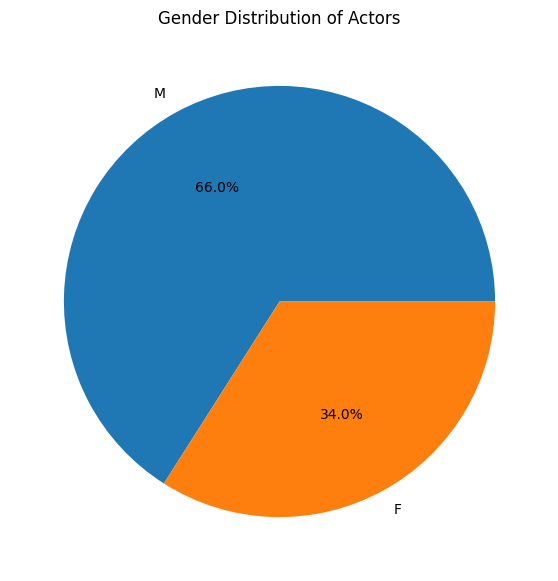

In [184]:
# 3. Gender Distribution of Actors in oceanic_actors dataset
gender_distribution = oceanic_actors['actor_gender'].value_counts()
gender_distribution_percentage = oceanic_actors['actor_gender'].value_counts(normalize=True) * 100
print("\nGender Distribution (Count):")
print(gender_distribution)
print("\nGender Distribution (Percentage):")
print(gender_distribution_percentage)

# Visualization: Gender Distribution (pie chart)
plt.figure(figsize=(7, 7))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution of Actors')
plt.ylabel('')  # Hide the y-label for the pie chart
plt.show()

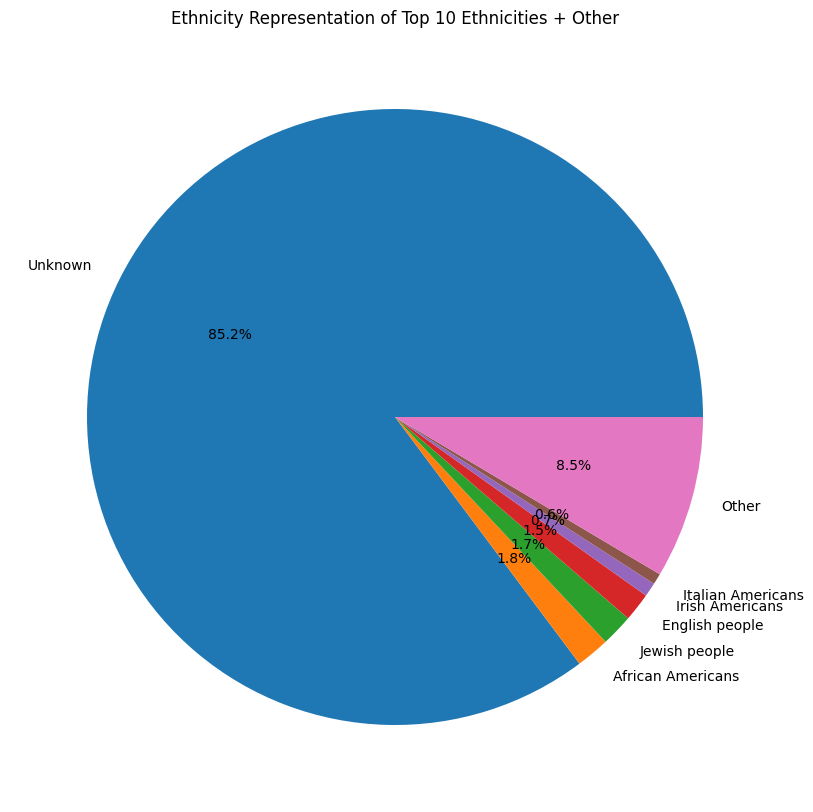

In [186]:
# 5. Ethnicity Representation in oceanic_actors dataset
ethnicity_representation = oceanic_actors['actor_ethnicity_label'].value_counts()

# Exclude "Unknown" and keep the top 5 ethnicities
top_ethnicities = ethnicity_representation.nlargest(6)
remaining_ethnicities_sum = ethnicity_representation[~ethnicity_representation.index.isin(top_ethnicities.index)].sum()

# Add the "Other" category
top_ethnicities['Other'] = remaining_ethnicities_sum

# Visualization: Ethnicity Representation (pie chart)
plt.figure(figsize=(10, 10))
top_ethnicities.plot(kind='pie', autopct='%1.1f%%', title='Ethnicity Representation of Top 10 Ethnicities + Other')
plt.ylabel('')  # Hide the y-label for the pie chart
plt.show()


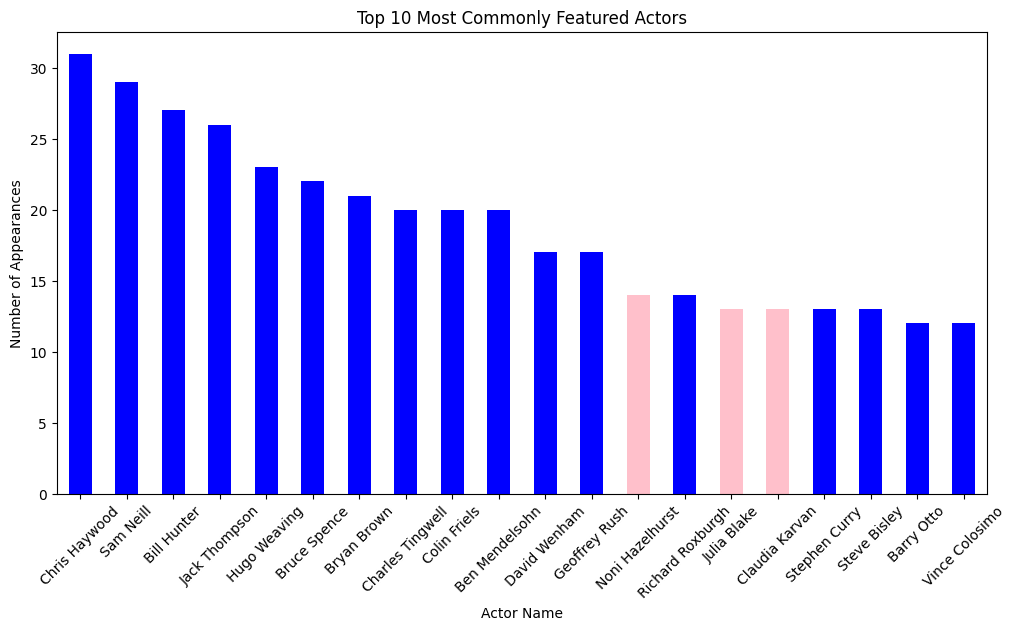

In [240]:
# 6. Most Commonly Featured Actors in oceanic_global dataset
# Ensure 'actor_name' is a column after resetting the index
most_common_actors = oceanic_global['actor_name'].value_counts().head(20)



colors = pd.Series()
i = 0
for name in most_common_actors.index.values:
    colors[i] = 'pink' if oceanic_actors[oceanic_actors['actor_name'] == name]['actor_gender'].unique()[0] == 'F' else 'blue'
    i += 1

# Visualization: Most Commonly Featured Actors (bar plot)
plt.figure(figsize=(12, 6))
most_common_actors.plot(kind='bar', title='Top 10 Most Commonly Featured Actors', color=colors)
plt.xlabel('Actor Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.show()

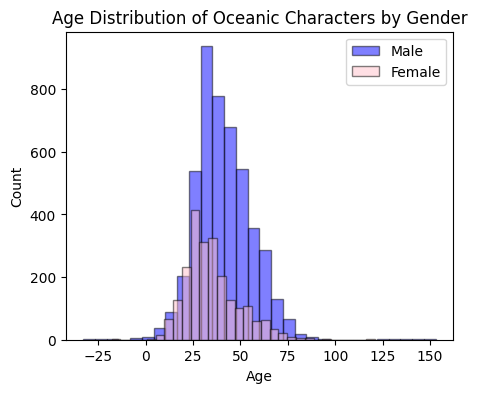

In [189]:
# 7. Age Distribution of Actors in oceanic_global dataset
# Ensure 'actor_name' and 'actor_gender' are columns in oceanic_global
# Step 3: Age Distribution by Gender (Non-Interactive)

male_ages = actor_ages[actor_ages['actor_gender'] == 'M']['age_at_release'].dropna()
female_ages = actor_ages[actor_ages['actor_gender'] == 'F']['age_at_release'].dropna()
plt.figure(figsize=(5, 4))
plt.hist(male_ages, bins=30, color='blue', alpha=0.5, label='Male', edgecolor='black')
plt.hist(female_ages, bins=30, color='pink', alpha=0.5, label='Female', edgecolor='black')
plt.title("Age Distribution of Oceanic Characters by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


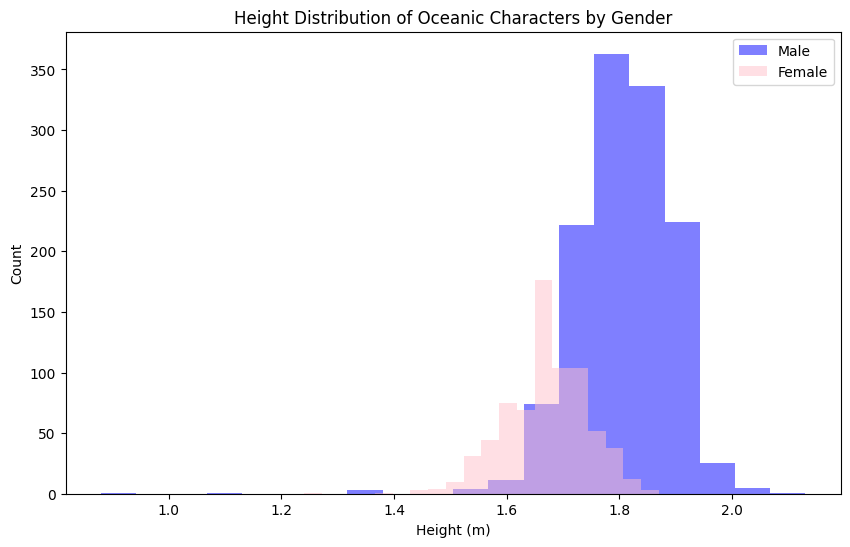

In [191]:
# Filter the oceanic_global DataFrame by gender
male_actors_height = oceanic_actors[oceanic_actors['actor_gender'] == 'M']['actor_height']
female_actors_height = oceanic_actors[oceanic_actors['actor_gender'] == 'F']['actor_height']


# Plot the height distribution
plt.figure(figsize=(10, 6))
plt.hist(male_actors_height, bins=20, alpha=0.5, label='Male', color='blue')
plt.hist(female_actors_height, bins=20, alpha=0.5, label='Female', color='pink')

# Add titles and labels
plt.title('Height Distribution of Oceanic Characters by Gender')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [218]:
global_use = oceanic_global.merge(oceanic_actors, on='actor_name', how='inner')

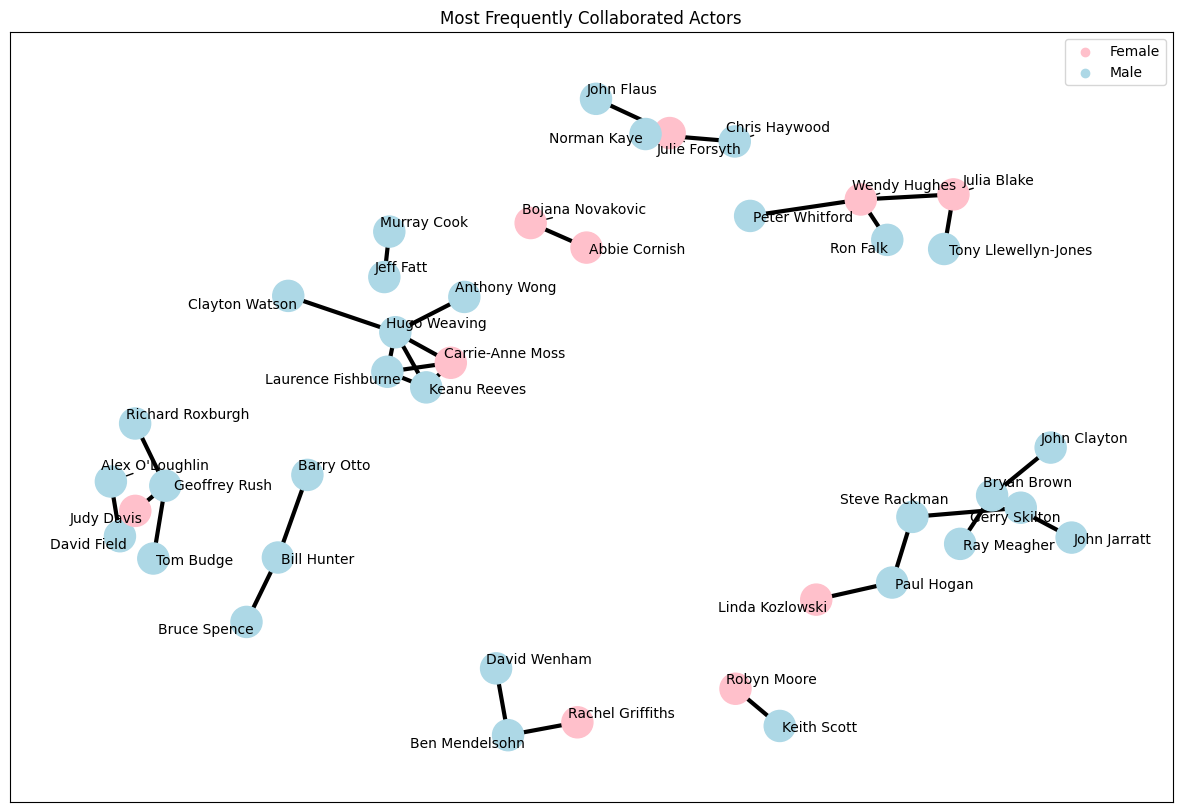

In [239]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Step 1: Create a DataFrame of actor pairs by movie
actor_pairs = []
for movie, group in global_use.groupby('movie_name'):
    actors = group['actor_name'].unique()
    if len(actors) > 1:
        actor_pairs.extend(combinations(actors, 2))

# Step 2: Create a DataFrame of actor pair counts
actor_pairs_df = pd.DataFrame(actor_pairs, columns=['Actor 1', 'Actor 2'])
collaboration_counts = actor_pairs_df.value_counts().reset_index(name='Count')

# Step 3: Filter to show only significant collaborations (e.g., more than 1 movie)
significant_collaborations = collaboration_counts[collaboration_counts['Count'] > 2]

# Step 4: Create a network graph
G = nx.Graph()
for _, row in significant_collaborations.iterrows():
    G.add_edge(row['Actor 1'], row['Actor 2'], weight=row['Count'])

# Step 5: Assign node colors based on gender
node_colors = []
for node in G.nodes():
    if global_use.loc[global_use['actor_name'] == node, 'actor_gender'].iloc[0] == 'F':
        node_colors.append('pink')
    else:
        node_colors.append('lightblue')

# Step 6: Plot the graph with adjusted labels
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

# Add labels with adjustText to avoid overlap
texts = []
for node, (x, y) in pos.items():
    texts.append(plt.text(x, y, node, fontsize=10, ha='center', va='center'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Add a legend for gender
plt.scatter([], [], color='pink', label='Female')
plt.scatter([], [], color='lightblue', label='Male')
plt.legend(loc='upper right')

plt.title('Most Frequently Collaborated Actors')
plt.show()


In [234]:
ethnicities = oceanic_actors['actor_ethnicity_label'].unique()

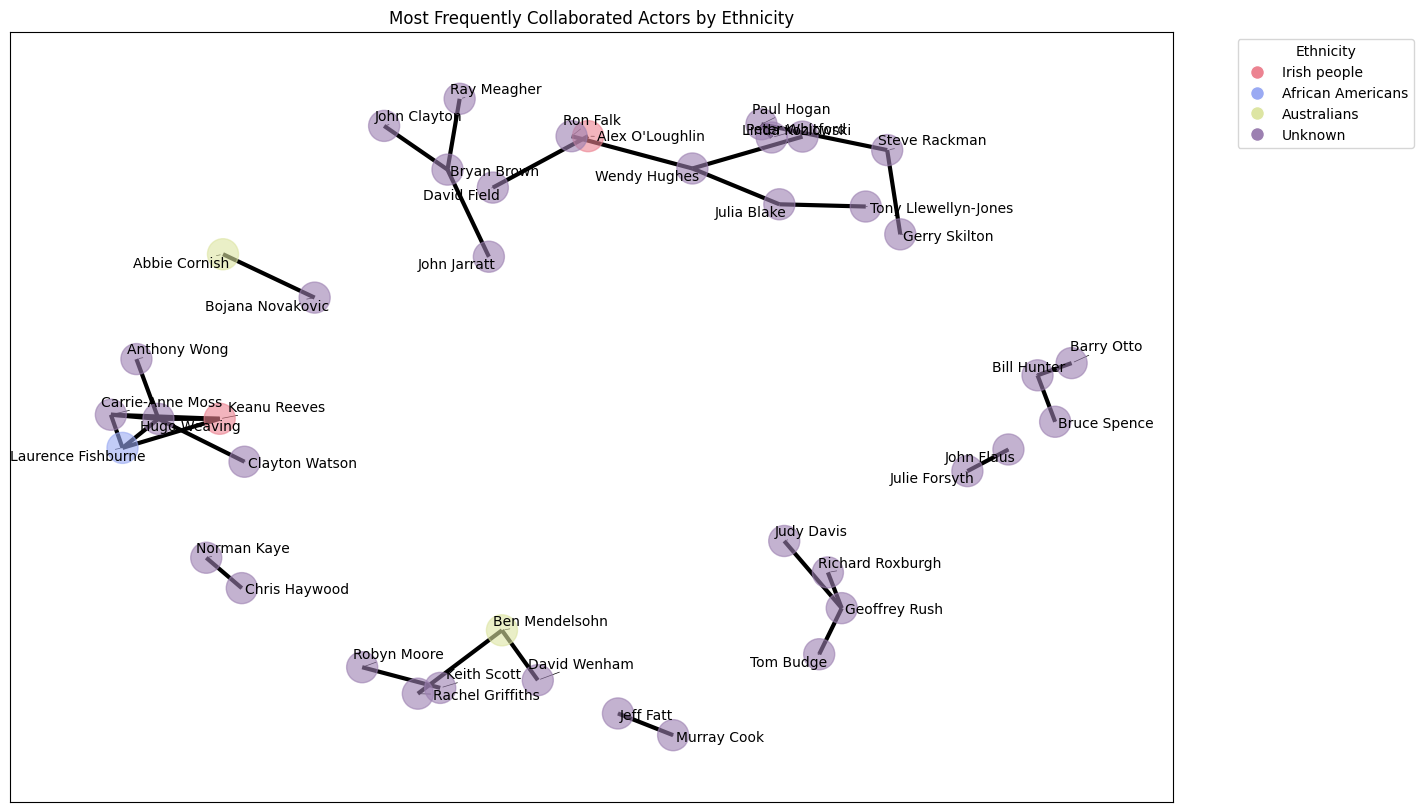

In [238]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from itertools import combinations
from adjustText import adjust_text
import matplotlib.colors as mcolors

# Step 1: Generate a random lighter color map for each unique ethnicity
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1 - amount) with the color and adding 'amount' to the result.
    Amount should be between 0 and 1.
    """
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = mcolors.to_rgb(c)
    return tuple([1 - (1 - component) * amount for component in c])

random.seed(42)  # For reproducibility
color_map = {ethnicity: lighten_color(f"#{random.randint(0, 0xFFFFFF):06x}", 0.5) for ethnicity in ethnicities}

# Step 2: Create a DataFrame of actor pairs by movie
actor_pairs = []
for movie, group in global_use.groupby('movie_name'):
    actors = group['actor_name'].unique()
    if len(actors) > 1:
        actor_pairs.extend(combinations(actors, 2))

# Step 3: Create a DataFrame of actor pair counts
actor_pairs_df = pd.DataFrame(actor_pairs, columns=['Actor 1', 'Actor 2'])
collaboration_counts = actor_pairs_df.value_counts().reset_index(name='Count')

# Step 4: Filter to show only significant collaborations (e.g., more than 1 movie)
significant_collaborations = collaboration_counts[collaboration_counts['Count'] > 2]

# Step 5: Create a network graph
G = nx.Graph()
for _, row in significant_collaborations.iterrows():
    G.add_edge(row['Actor 1'], row['Actor 2'], weight=row['Count'])

# Step 6: Assign node colors based on ethnicity with transparency
node_colors = []
ethnicities_in_graph = set()
for node in G.nodes():
    ethnicity = global_use.loc[global_use['actor_name'] == node, 'actor_ethnicity_label'].iloc[0]
    node_color = color_map.get(ethnicity, (0.8, 0.8, 0.8, 0.5))  # Default to a light gray if ethnicity is missing
    node_colors.append(node_color + (0.6,))  # Adding alpha for transparency
    if ethnicity in color_map:  # Only add to the set if it exists in the color map
        ethnicities_in_graph.add(ethnicity)

# Step 7: Plot the graph with a legend and readable labels
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

# Collect labels for adjustment
texts = []
for node, (x, y) in pos.items():
    texts.append(plt.text(x, y, s=node, fontsize=10, ha='center', va='center'))

# Use adjustText to avoid label overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

# Create a legend with only ethnicities present in the graph
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[ethnicity], markersize=10, label=ethnicity)
                  for ethnicity in ethnicities_in_graph]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="Ethnicity")

plt.title('Most Frequently Collaborated Actors by Ethnicity')
plt.show()
